## Packages

In [93]:
# Standard Packages
import numpy as np
import pandas as pd

import string # For punctuation
import re # Regular expressions

from nltk.corpus import stopwords
stop_words = stopwords.words("english")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from nltk.stem import WordNetLemmatizer # Lemmatization
from nltk.stem import PorterStemmer # Stemming


## Reading File

In [94]:
user_prompt7 = pd.read_csv("prompt7_essays.csv", index_col=0)
print(user_prompt7.head())


                                           gen_essay
0  \n\n\nI was having a really hard time with mat...
1  \n\nMy mom is always so patient with me. We go...
2  \n\n\nPatience is one of the most important th...
3  \n\nA woman was at the doctor's office for her...
4  \n\nPatience is a virtue that is often times d...


Note: We have 1730 prompt 7 essays with average of 250 words.

## Data Cleaning

In [95]:
def remove_punctuation(text):
    # Removes punctuation and newlines from sentences.
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct = ''.join(no_punct)
    words_wo_punct = str.strip(words_wo_punct)
    return words_wo_punct

user_prompt7['gen_essay_punct'] = user_prompt7['gen_essay'].apply(lambda x: remove_punctuation(x))
user_prompt7.head()

,gen_essay,gen_essay_punct
0,\n\n\nI was having a really hard time with mat...,I was having a really hard time with math but ...
1,\n\nMy mom is always so patient with me. We go...,My mom is always so patient with me We go thro...
2,\n\n\nPatience is one of the most important th...,Patience is one of the most important things y...
3,\n\nA woman was at the doctor's office for her...,A woman was at the doctors office for her annu...
4,\n\nPatience is a virtue that is often times d...,Patience is a virtue that is often times diffi...


In [96]:
def tokenize(text):
    # Split a string into words using regular expressions
    # The \W+ splits on one or more nonword character
    split = re.split("\W+",text) 
    return split
user_prompt7['gen_essay_tokenize'] = user_prompt7['gen_essay_punct'].apply(lambda x: tokenize(x.lower()))
user_prompt7.iloc[:, 1:].head()

,gen_essay_punct,gen_essay_tokenize
0,I was having a really hard time with math but ...,"[i, was, having, a, really, hard, time, with, ..."
1,My mom is always so patient with me We go thro...,"[my, mom, is, always, so, patient, with, me, w..."
2,Patience is one of the most important things y...,"[patience, is, one, of, the, most, important, ..."
3,A woman was at the doctors office for her annu...,"[a, woman, was, at, the, doctors, office, for,..."
4,Patience is a virtue that is often times diffi...,"[patience, is, a, virtue, that, is, often, tim..."


In [97]:
# Take a look at first 10 frequent stop words in English
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [98]:
def remove_stopwords(text):
    # Remove stop words in each essay
    text = [word for word in text if word not in stop_words]
    return text
user_prompt7['gen_essay_wo_stopwords'] = user_prompt7['gen_essay_tokenize'].apply(lambda x: remove_stopwords(x))
user_prompt7.iloc[:, 2:].head()

,gen_essay_tokenize,gen_essay_wo_stopwords
0,"[i, was, having, a, really, hard, time, with, ...","[really, hard, time, math, teacher, told, us, ..."
1,"[my, mom, is, always, so, patient, with, me, w...","[mom, always, patient, go, many, trials, tribu..."
2,"[patience, is, one, of, the, most, important, ...","[patience, one, important, things, life, wheth..."
3,"[a, woman, was, at, the, doctors, office, for,...","[woman, doctors, office, annual, checkup, doct..."
4,"[patience, is, a, virtue, that, is, often, tim...","[patience, virtue, often, times, difficult, fi..."


In [99]:
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    # Find the root of word using lemmatization (by dictionary definition)
    # This takes into account the context of word used
    text = [lemmatizer.lemmatize(word) for word in text]
    return text
user_prompt7['gen_essay_lemmatized'] = user_prompt7['gen_essay_wo_stopwords'].apply(lambda x: lemmatization(x))
user_prompt7.iloc[:, 3:].head()

,gen_essay_wo_stopwords,gen_essay_lemmatized
0,"[really, hard, time, math, teacher, told, us, ...","[really, hard, time, math, teacher, told, u, w..."
1,"[mom, always, patient, go, many, trials, tribu...","[mom, always, patient, go, many, trial, tribul..."
2,"[patience, one, important, things, life, wheth...","[patience, one, important, thing, life, whethe..."
3,"[woman, doctors, office, annual, checkup, doct...","[woman, doctor, office, annual, checkup, docto..."
4,"[patience, virtue, often, times, difficult, fi...","[patience, virtue, often, time, difficult, fin..."


In [100]:
ps = PorterStemmer()
def stemming(text):
    # Find root word by stemming (leads to less words than lemming)
    # This can chop off end of some words
    text = [ps.stem(word) for word in text]
    return text
user_prompt7['gen_essay_stemmed'] = user_prompt7['gen_essay_wo_stopwords'].apply(lambda x: stemming(x))
user_prompt7.iloc[:, 4:].head()  

,gen_essay_lemmatized,gen_essay_stemmed
0,"[really, hard, time, math, teacher, told, u, w...","[realli, hard, time, math, teacher, told, us, ..."
1,"[mom, always, patient, go, many, trial, tribul...","[mom, alway, patient, go, mani, trial, tribul,..."
2,"[patience, one, important, thing, life, whethe...","[patienc, one, import, thing, life, whether, p..."
3,"[woman, doctor, office, annual, checkup, docto...","[woman, doctor, offic, annual, checkup, doctor..."
4,"[patience, virtue, often, time, difficult, fin...","[patienc, virtu, often, time, difficult, find,..."


In [101]:
user_prompt7.head()

,gen_essay,gen_essay_punct,gen_essay_tokenize,gen_essay_wo_stopwords,gen_essay_lemmatized,gen_essay_stemmed
0,\n\n\nI was having a really hard time with mat...,I was having a really hard time with math but ...,"[i, was, having, a, really, hard, time, with, ...","[really, hard, time, math, teacher, told, us, ...","[really, hard, time, math, teacher, told, u, w...","[realli, hard, time, math, teacher, told, us, ..."
1,\n\nMy mom is always so patient with me. We go...,My mom is always so patient with me We go thro...,"[my, mom, is, always, so, patient, with, me, w...","[mom, always, patient, go, many, trials, tribu...","[mom, always, patient, go, many, trial, tribul...","[mom, alway, patient, go, mani, trial, tribul,..."
2,\n\n\nPatience is one of the most important th...,Patience is one of the most important things y...,"[patience, is, one, of, the, most, important, ...","[patience, one, important, things, life, wheth...","[patience, one, important, thing, life, whethe...","[patienc, one, import, thing, life, whether, p..."
3,\n\nA woman was at the doctor's office for her...,A woman was at the doctors office for her annu...,"[a, woman, was, at, the, doctors, office, for,...","[woman, doctors, office, annual, checkup, doct...","[woman, doctor, office, annual, checkup, docto...","[woman, doctor, offic, annual, checkup, doctor..."
4,\n\nPatience is a virtue that is often times d...,Patience is a virtue that is often times diffi...,"[patience, is, a, virtue, that, is, often, tim...","[patience, virtue, often, times, difficult, fi...","[patience, virtue, often, time, difficult, fin...","[patienc, virtu, often, time, difficult, find,..."


## Adding Numeric Columns

In [102]:
# # Counting punctuation in essays
# user_prompt7["punctuation_count"] = user_prompt7["gen_essay"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [103]:
# # Counting characters in essays
# user_prompt7["char_count"] = user_prompt7["gen_essay_punct"].apply(lambda x: len(str(x)))

## Visualizing Words

/var/folders/cp/xbqnk_qx2175bw128m89spk00000gp/T/ipykernel_30425/3088459410.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


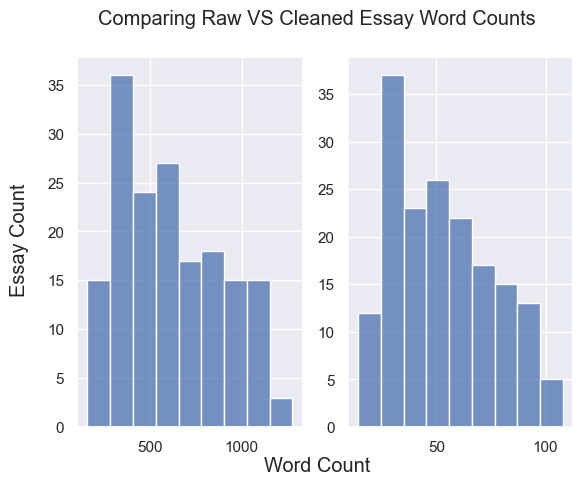

In [104]:
# Comparing length of Raw VS Clean Essays
fig, ax = plt.subplots(1,2)
sns.histplot(user_prompt7['gen_essay'].str.len(), ax=ax[0])
sns.histplot(user_prompt7['gen_essay_wo_stopwords'].str.len(), ax=ax[1])
[x.set(xlabel=None, ylabel=None) for x in ax]
fig.supxlabel("Word Count")
fig.supylabel("Essay Count")
fig.suptitle("Comparing Raw VS Cleaned Essay Word Counts")
fig.show()

### Average Words Per Essay

In [105]:
print("Average Number of Words in Essays: {} words".format(np.mean([len(row) for row in user_prompt7["gen_essay"]])))
print("Average Number of Words in Essays Without Stopwords: {} words".format(np.mean([len(row) for row in user_prompt7["gen_essay_wo_stopwords"]])))

Average Number of Words in Essays: 616.1764705882352 words
Average Number of Words in Essays Without Stopwords: 53.38235294117647 words


### Lemmatized VS Stemmed Word Counts

/var/folders/cp/xbqnk_qx2175bw128m89spk00000gp/T/ipykernel_30425/1564392091.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


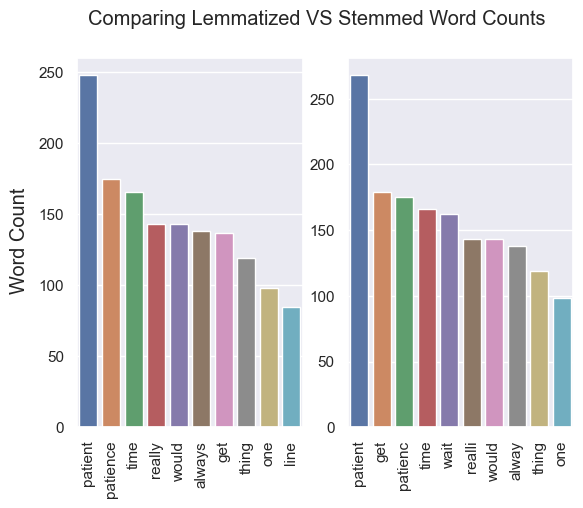

In [106]:
# Use explode to expand the lists into separate rows
temp_lemm = user_prompt7["gen_essay_lemmatized"].explode().to_frame().reset_index(drop=True)
temp_stem = user_prompt7["gen_essay_stemmed"].explode().to_frame().reset_index(drop=True)

fig, ax = plt.subplots(1,2)
sns.countplot(x="gen_essay_lemmatized", data=temp_lemm, order=temp_lemm["gen_essay_lemmatized"].value_counts().iloc[:10].index, ax=ax[0])
sns.countplot(x="gen_essay_stemmed", data=temp_stem, order=temp_stem["gen_essay_stemmed"].value_counts().iloc[:10].index, ax=ax[1])
[x.set(xlabel=None, ylabel=None) for x in ax]
[x.set_xticklabels(x.get_xticklabels(), rotation=90) for x in ax]
fig.supylabel("Word Count")
fig.suptitle("Comparing Lemmatized VS Stemmed Word Counts")
fig.show()

### Total Unique Words

In [107]:
print("Number of Unique Words in Lemmatized Essays: {} words".format(temp_lemm.nunique()[-1]))
print("Number of Unique Words in Stemmed Essays: {} words".format(temp_stem.nunique()[-1]))

Number of Unique Words in Lemmatized Essays: 1648 words
Number of Unique Words in Stemmed Essays: 1385 words


### Average Words Lemmatized Stemmed

In [87]:
print("Average Number of Words in Lemmatized Essays: {} words".format(np.mean([len(row) for row in user_prompt7["gen_essay_lemmatized"]])))
print("Average Number of Words in Stemmed Essays: {} words".format(np.mean([len(row) for row in user_prompt7["gen_essay_stemmed"]])))

Average Number of Words in Lemmatized Essays: 53.38235294117647 words
Average Number of Words in Stemmed Essays: 53.38235294117647 words


## Cleaning Chat-GPT

In [116]:
chatgpt_prompt7 = pd.read_csv("../../u-integrity/data/chatgpt_prompt7_essays.csv", index_col=0)
chatgpt_prompt7.head()

,gen_essay
0,\n\n\nI was having a really hard time with mat...
1,\n\nMy mom is always so patient with me. We go...
2,\n\n\nPatience is one of the most important th...
3,\n\nA woman was at the doctor's office for her...
4,\n\nPatience is a virtue that is often times d...


In [117]:
chatgpt_prompt7['gen_essay_punct'] = chatgpt_prompt7['gen_essay'].apply(lambda x: remove_punctuation(x))
chatgpt_prompt7['gen_essay_tokenize'] = chatgpt_prompt7['gen_essay_punct'].apply(lambda x: tokenize(x.lower()))
chatgpt_prompt7['gen_essay_wo_stopwords'] = chatgpt_prompt7['gen_essay_tokenize'].apply(lambda x: remove_stopwords(x))
chatgpt_prompt7['gen_essay_lemmatized'] = chatgpt_prompt7['gen_essay_wo_stopwords'].apply(lambda x: lemmatization(x))
chatgpt_prompt7['gen_essay_stemmed'] = chatgpt_prompt7['gen_essay_wo_stopwords'].apply(lambda x: stemming(x))

In [118]:
chatgpt_prompt7.head()

,gen_essay,gen_essay_punct,gen_essay_tokenize,gen_essay_wo_stopwords,gen_essay_lemmatized,gen_essay_stemmed
0,\n\n\nI was having a really hard time with mat...,I was having a really hard time with math but ...,"[i, was, having, a, really, hard, time, with, ...","[really, hard, time, math, teacher, told, us, ...","[really, hard, time, math, teacher, told, u, w...","[realli, hard, time, math, teacher, told, us, ..."
1,\n\nMy mom is always so patient with me. We go...,My mom is always so patient with me We go thro...,"[my, mom, is, always, so, patient, with, me, w...","[mom, always, patient, go, many, trials, tribu...","[mom, always, patient, go, many, trial, tribul...","[mom, alway, patient, go, mani, trial, tribul,..."
2,\n\n\nPatience is one of the most important th...,Patience is one of the most important things y...,"[patience, is, one, of, the, most, important, ...","[patience, one, important, things, life, wheth...","[patience, one, important, thing, life, whethe...","[patienc, one, import, thing, life, whether, p..."
3,\n\nA woman was at the doctor's office for her...,A woman was at the doctors office for her annu...,"[a, woman, was, at, the, doctors, office, for,...","[woman, doctors, office, annual, checkup, doct...","[woman, doctor, office, annual, checkup, docto...","[woman, doctor, offic, annual, checkup, doctor..."
4,\n\nPatience is a virtue that is often times d...,Patience is a virtue that is often times diffi...,"[patience, is, a, virtue, that, is, often, tim...","[patience, virtue, often, times, difficult, fi...","[patience, virtue, often, time, difficult, fin...","[patienc, virtu, often, time, difficult, find,..."


In [119]:
chatgpt_prompt7.to_csv("cleaned_chatgpt_essay_set_7.csv")

In [120]:
user_prompt7.to_csv("cleaned_kaggle_essay_set_7.csv")